In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.feature_selection import f_classif

In [3]:
df = pd.read_csv("D:\Machine Learning Projects\Customer Churn Prediction\dataset\Telco-Customer-Churn.csv")
df.head()

df_clean = pd.read_csv("D:\Machine Learning Projects\Customer Churn Prediction\dataset\Telco-Customer-Churn-Cleaned.csv")
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Group,TotalCharges_Group
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,1,2,29.85,29.85,0,5,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,1,0,3,56.95,1889.50,0,11,3
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,1,3,53.85,108.15,1,10,0
3,1,0,0,0,45,0,1,0,2,0,...,0,0,1,0,0,42.30,1840.75,0,8,3
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,1,2,70.70,151.65,1,14,0


In [4]:
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

colors = ['Orange', "Black"]
df_clean.drop(columns = ['MonthlyCharges_Group','TotalCharges_Group'], inplace = True)

df_clean['tenure'] = mms.fit_transform(df_clean[['tenure']])
df_clean['MonthlyCharges'] = mms.fit_transform(df_clean[['MonthlyCharges']])
df_clean['TotalCharges'] = mms.fit_transform(df_clean[['TotalCharges']])
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


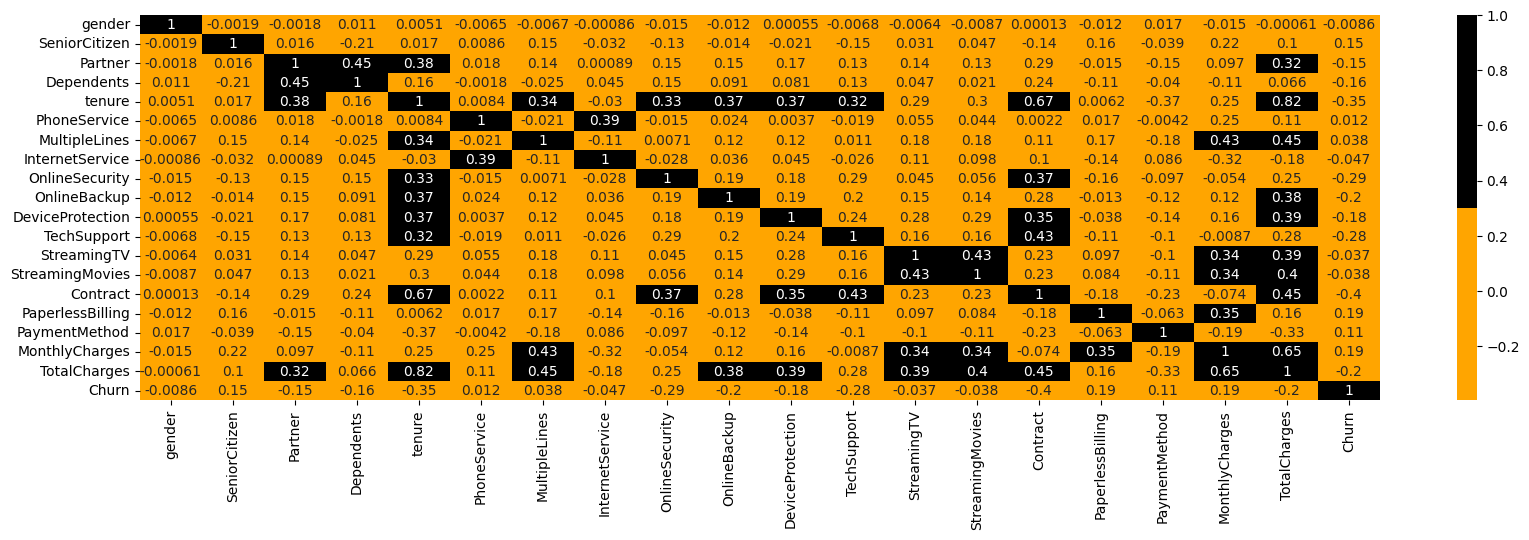

In [6]:
plt.figure(figsize = (20,5))
sns.heatmap(df_clean.corr(),cmap = colors,annot = True);

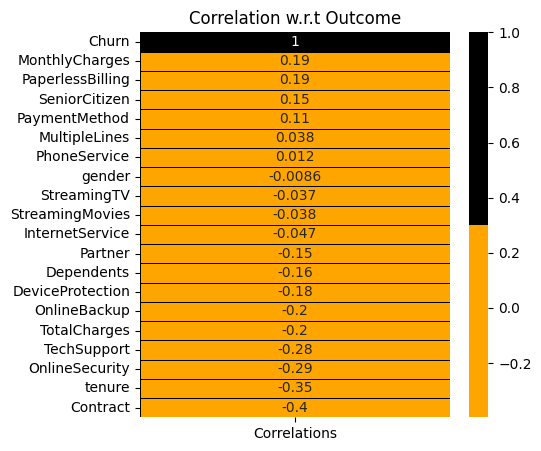

In [7]:
corr = df_clean.corrwith(df_clean['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

In [8]:
col = list(df_clean.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print("Categorical Features :", *categorical_features)
print("Numerical Features :" , *numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


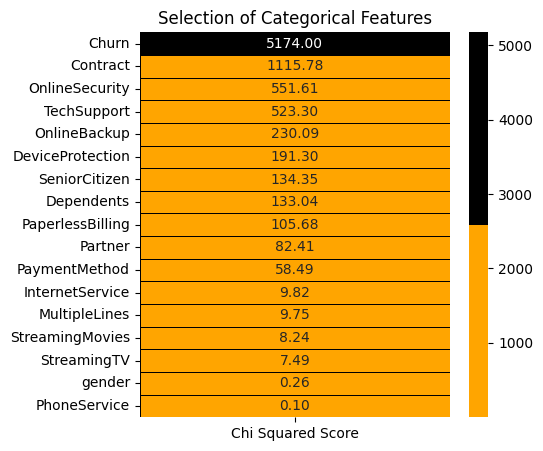

In [9]:
features = df_clean.loc[:,categorical_features]
target = df_clean.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

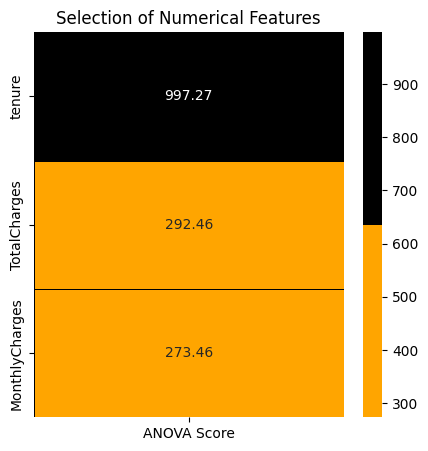

In [11]:
features = df_clean.loc[:,numerical_features]
target = df_clean.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [12]:
df_clean.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df_clean.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.013889,0,2,0,0,0,1,2,0.115423,0.001275,0
1,0,0,0,0.472222,2,0,2,0,1,0,3,0.385075,0.215867,0
2,0,0,0,0.027778,2,2,0,0,0,1,3,0.354229,0.010310,1
3,0,0,0,0.625000,2,0,2,2,1,0,0,0.239303,0.210241,0
4,0,0,0,0.027778,0,0,0,0,0,1,2,0.521891,0.015330,1


In [13]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [14]:
over = SMOTE(sampling_strategy = 1)

f1 = df_clean.iloc[:,:13].values
t1 = df_clean.iloc[:,13].values

f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({0: 5174, 1: 5174})

In [15]:
df_clean.head()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   float64
 4   OnlineSecurity    7043 non-null   int64  
 5   OnlineBackup      7043 non-null   int64  
 6   DeviceProtection  7043 non-null   int64  
 7   TechSupport       7043 non-null   int64  
 8   Contract          7043 non-null   int64  
 9   PaperlessBilling  7043 non-null   int64  
 10  PaymentMethod     7043 non-null   int64  
 11  MonthlyCharges    7043 non-null   float64
 12  TotalCharges      7043 non-null   float64
 13  Churn             7043 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 770.5 KB


In [17]:
print("\n📝 NEXT STEPS:")
print("=" * 15)
print("1. ✅ Data Loading & Exploration & Cleaning - COMPLETED")
print("2. ✅ Exploratory Data Analysis (EDA) - COMPLETED")
print("3. ✅ Feature Engineering - COMPLETED")

# Save the loaded data for next notebook
print("\n💾 Saving processed data for next notebook...")
df.to_csv('Telco-Customer-Churn.csv', index=False)
print("✅ Data saved to 'Telco-Customer-Churn.csv'")
df_clean.to_csv('Telco-Customer-Churn-Cleaned.csv', index=False)
print("✅ Data saved to 'Telco-Customer-Churn-Cleaned.csv'")


📝 NEXT STEPS:
1. ✅ Data Loading & Exploration & Cleaning - COMPLETED
2. ✅ Exploratory Data Analysis (EDA) - COMPLETED
3. ✅ Feature Engineering - COMPLETED

💾 Saving processed data for next notebook...
✅ Data saved to 'Telco-Customer-Churn.csv'
✅ Data saved to 'Telco-Customer-Churn-Cleaned.csv'
